<a href="https://colab.research.google.com/github/sisco1113/transfer-learning-VGG16-cifar-10/blob/main/Transfer_Learning_VGG16_Cifar10_(Deep_Learning_AI_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 3s 0us/step
Train_images shape: (50000, 32, 32, 3)
Train_labels shape: (50000, 1)
Test_images shape: (10000, 32, 32, 3)
Test_labels shape: (10000, 1)


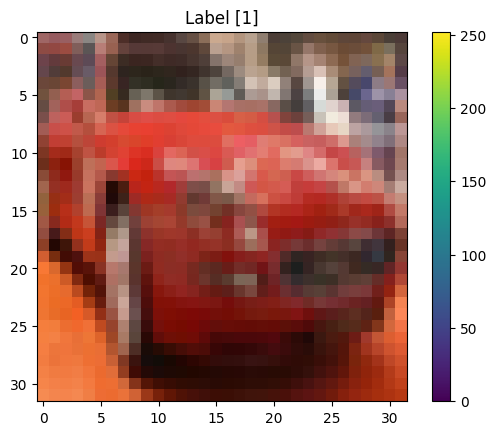

58889256/58889256 [==============================] - 1s 0us/step
Epoch 1/10
1250/1250 [==============================] - 22s 11ms/step - loss: 1.4437 - accuracy: 0.5018 - val_loss: 1.2156 - val_accuracy: 0.5815
Epoch 2/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1648 - accuracy: 0.5942 - val_loss: 1.1498 - val_accuracy: 0.6062
Epoch 3/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.1111 - accuracy: 0.6125 - val_loss: 1.1432 - val_accuracy: 0.6075
Epoch 4/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0722 - accuracy: 0.6274 - val_loss: 1.1293 - val_accuracy: 0.6124
Epoch 5/10
1250/1250 [==============================] - 12s 10ms/step - loss: 1.0429 - accuracy: 0.6374 - val_loss: 1.1333 - val_accuracy: 0.6056
Epoch 6/10
1250/1250 [==============================] - 13s 11ms/step - loss: 1.0170 - accuracy: 0.6460 - val_loss: 1.1356 - val_accuracy: 0.6058
Epoch 7/10
1250/1250 [==============================] - 13s

In [ ]:
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping
from keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Show the shapes of the data
print("Train_images shape:", train_images.shape)
print("Train_labels shape:", train_labels.shape)
print("Test_images shape:", test_images.shape)
print("Test_labels shape:", test_labels.shape)

# Display i-th image
idx = 5
image = train_images[idx]
label = train_labels[idx]

plt.figure()
plt.imshow(image)
plt.title('Label {}'.format(label))
plt.colorbar()
plt.grid(False)
plt.show()

X_train = train_images
X_test = test_images
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=train_images[0].shape)
base_model.trainable = False

flatten_layer = Flatten()
dense_layer_1 = Dense(50, activation='relu')
batch_norm_layer_1 = BatchNormalization()
dense_layer_2 = Dense(20, activation='relu')
prediction_layer = Dense(10, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    batch_norm_layer_1,
    dense_layer_2,
    prediction_layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

model.fit(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[es])

test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Accuracy:", test_accuracy)
